<a href="https://colab.research.google.com/github/samchak18/Demand-Prediction-for-Public-Transport-in-Nairobi/blob/main/Final_NOTEBOOK_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import datetime

In [ ]:
# Load the dataset
Transport_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Day 1/train_revised.csv')

# Print the first 5 rows of the dataframe.
Transport_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
Transport_df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


### **Understanding The data**

In [ ]:
Transport_df.shape

(51645, 10)

There are 51645 observations in the dataset. And has 10 columns.

In [ ]:
Transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
Transport_df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,EIK8ICDAQQ,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [ ]:
Transport_df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

We don't see any null values in the dataset now.

so let us explore the dataset more.

In [ ]:
len(Transport_df['ride_id'].unique())

6249

In [ ]:
column = Transport_df.columns

In [ ]:
column

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

### Finding Our Target Variable

Since we are not given the target variable so we need to find target variable first.

There might be many ways of finding the target variable but here I am using one way that is I will find the count of each `ride_id` and that will be the `number_of_ticket` as our target variable.

In [ ]:
ride_id_dic = {}
for ride_id in Transport_df["ride_id"]:
    if not ride_id in ride_id_dic:
        ride_id_dic["ride_id"] = 1
    else:
        ride_id_dic["ride_id"] += 1

for i in range(len(Transport_df)):
    ride_id = Transport_df.loc[i]["ride_id"]
    Transport_df.at[i,"number_of_tickets"] = ride_id_dic["ride_id"]

In [ ]:
Transport_df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,1.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,1.0
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1.0
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49,1.0
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49,1.0
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49,1.0


#### Now we found our target variable so let us delete the duplicate values from `ride_id` 

In [ ]:
Transport_df=Transport_df.drop_duplicates("ride_id")

In [ ]:
Transport_df.shape

(6249, 11)

Now let us merge two datasets on `ride_id` key to make the final dataset where we have dependent as well as independent variables too.

Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [ ]:
Transport_df = Transport_df.drop(['seat_number','payment_method','payment_receipt'], axis=1)

### **Removing Constant Features**

We need to first remove the constant features. 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Transport_df.drop(["travel_to"],axis=1,inplace=True)


### **Feature Engineering**

In [ ]:
#concatenate travel date and travel time column and make a new feature called date.
Transport_df["date"]=Transport_df["travel_date"]+ " "+Transport_df["travel_time"]


In [ ]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [ ]:
Transport_df1 = time_features(Transport_df)

In [ ]:
Transport_df1.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,1.0,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,1.0,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11


In [ ]:
Transport_df1["travel_time"] = Transport_df1["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [ ]:
Transport_df1['period'] = np.nan
Transport_df1.loc[Transport_df1.travel_time < 7, 'period'] = 'em'
Transport_df1.loc[(Transport_df1.travel_time >= 7) & (Transport_df1.travel_time < 11), 'period'] = 'am'
Transport_df1.loc[(Transport_df1.travel_time >= 11) & (Transport_df1.travel_time < 15), 'period'] = 'mid'
Transport_df1.loc[(Transport_df1.travel_time >= 15) & (Transport_df1.travel_time < 19), 'period'] = 'eve'
Transport_df1.loc[(Transport_df1.travel_time >= 19) & (Transport_df1.travel_time <= 24), 'period'] = 'pm'

pcount = dict(Transport_df1['period'].value_counts())
pcount

Transport_df1['hourly_travelers'] = np.log1p(Transport_df1['period'].map(pcount))

dcount = dict(Transport_df1["day_of_year"].value_counts())
Transport_df1["daily_travelers"] = np.log1p(Transport_df1["day_of_year"].map(dcount))
Transport_df1.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,1.0,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,1.0,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11,am,8.494743,3.871201


In [ ]:
Transport_df1.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_tickets', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'hour', 'minute', 'is_weekend', 'year',
       'quarter', 'month', 'period', 'hourly_travelers', 'daily_travelers'],
      dtype='object')

In [ ]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [ ]:
transport_dataset=Transport_df1.copy()

In [ ]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,1.0,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,1.0,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11,am,8.494743,3.871201


In [ ]:
transport_dataset.shape

(6249, 20)

In [ ]:
transport_dataset.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [ ]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
transport_dataset['month'].replace(dict_cov,inplace=True)
  

In [ ]:
transport_dataset.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [ ]:
transport_dataset.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [ ]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
transport_dataset['day_of_month'].replace(conv_dict,inplace=True)

In [ ]:
transport_dataset['day_of_month'].value_counts()

1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [ ]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,2,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,2,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,3,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,1.0,2017-11-27 07:10:00,0,331,3,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,1.0,2017-11-27 07:12:00,0,331,3,7,12,0,2017,4,2,am,8.494743,3.871201


In [ ]:

# Let us find the difference between next and previous buses

def find_difference_between_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus","Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  return data

In [ ]:
data = find_difference_between_bus(transport_dataset)

We see that there are some null values present in the dataset so let us remove those null values

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
2152,6654,05-12-17,7.133333,Awendo,Bus,49,1.0,2017-05-12 07:08:00,4,132,1,7,8,0,2017,2,3,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
44611,12926,01-04-18,7.133333,Awendo,Bus,49,1.0,2018-01-04 07:08:00,3,4,1,7,8,0,2018,1,1,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
44617,12929,01-04-18,7.200000,Awendo,Bus,49,1.0,2018-01-04 07:12:00,3,4,1,7,12,0,2018,1,1,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
44650,12935,01-04-18,7.216667,Awendo,Bus,49,1.0,2018-01-04 07:13:00,3,4,1,7,13,0,2018,1,1,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
44609,12924,01-04-18,8.000000,Awendo,Bus,49,1.0,2018-01-04 08:00:00,3,4,1,8,0,0,2018,1,1,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


In [ ]:
from datetime import datetime
from datetime import timedelta

In [ ]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
2152,6654,05-12-17,7.133333,Awendo,Bus,49,1.0,2017-05-12 07:08:00,4,132,1,7,8,0,2017,2,3,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
44611,12926,01-04-18,7.133333,Awendo,Bus,49,1.0,2018-01-04 07:08:00,3,4,1,7,8,0,2018,1,1,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
44617,12929,01-04-18,7.200000,Awendo,Bus,49,1.0,2018-01-04 07:12:00,3,4,1,7,12,0,2018,1,1,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
44650,12935,01-04-18,7.216667,Awendo,Bus,49,1.0,2018-01-04 07:13:00,3,4,1,7,13,0,2018,1,1,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
44609,12924,01-04-18,8.000000,Awendo,Bus,49,1.0,2018-01-04 08:00:00,3,4,1,8,0,0,2018,1,1,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


Now let us find the distance of each origin point from the destination point.
I used Nairobi Map to estimate the distance from origin point to destination map.




In [ ]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
data["travel_from_distance"]=data.travel_from.map(distance)

In [ ]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)

In [ ]:
data["Speed"]=data.travel_from_time/data.travel_from_distance

In [ ]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys(): 
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin 
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]
# data["is_rush_hour"]=0
# data.loc[data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

### **Encoding Categorical features**

In [ ]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)


In [ ]:
data.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus,travel_from_distance,travel_from_time,Speed,hod_arrived_date,minute_arrived_date,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
2152,6654,05-12-17,7.133333,1,49,1.0,2017-05-12 07:08:00,4,132,7,8,0,2017,2,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
44611,12926,01-04-18,7.133333,1,49,1.0,2018-01-04 07:08:00,3,4,7,8,0,2018,1,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44617,12929,01-04-18,7.200000,1,49,1.0,2018-01-04 07:12:00,3,4,7,12,0,2018,1,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,351.0,398,1.133903,13,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44650,12935,01-04-18,7.216667,1,49,1.0,2018-01-04 07:13:00,3,4,7,13,0,2018,1,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,351.0,398,1.133903,13,51,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44609,12924,01-04-18,8.000000,1,49,1.0,2018-01-04 08:00:00,3,4,8,0,0,2018,1,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,351.0,398,1.133903,14,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### ..

### Training the models

In [ ]:
keys= ["ride_id"]
Target_name="number_of_ticket"
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'max_capacity',"number_of_tickets",'period']


In [ ]:
features = data.drop(not_used_cols,axis=1).columns

In [ ]:
features

Index(['car_type', 'day_of_week', 'day_of_year', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'hourly_travelers', 'daily_travelers',
       'Time_gap_btw_0_1_next_bus', 'Time_gap_btw_0_1_previous_bus',
       'Time_gap_btw_0_2_next_bus', 'Time_gap_btw_0_2_previous_bus',
       'Time_gap_btw_0_3_next_bus', 'Time_gap_btw_0_3_previous_bus',
       'Time_gap_btw_next_previous_bus', 'travel_from_distance',
       'travel_from_time', 'Speed', 'hod_arrived_date', 'minute_arrived_date',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi',
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'day_of_month_1', 'day_of_month_2', 'day_of_month_3', 'month_1',
       'month_2', 'month_3'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
data[features]

,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus,travel_from_distance,travel_from_time,Speed,hod_arrived_date,minute_arrived_date,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
2152,1,4,132,7,8,0,2017,2,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
44611,1,3,4,7,8,0,2018,1,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44617,1,3,4,7,12,0,2018,1,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,351.0,398,1.133903,13,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44650,1,3,4,7,13,0,2018,1,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,351.0,398,1.133903,13,51,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44609,1,3,4,8,0,0,2018,1,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,351.0,398,1.133903,14,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47649,1,3,277,7,5,0,2018,4,8.494743,3.891820,-744.000000,720.000000,-760.083333,4015.916667,-1464.000000,4032.000000,1464.000000,399.0,450,1.127820,14,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
48048,1,6,308,7,5,1,2018,4,8.494743,3.970292,-16.083333,744.000000,-720.000000,1464.000000,-736.083333,4759.916667,760.083333,399.0,450,1.127820,14,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
47716,1,6,308,23,10,1,2018,4,5.659482,3.970292,-703.916667,16.083333,-720.000000,760.083333,-736.083333,1480.083333,720.000000,399.0,450,1.127820,6,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
48412,1,1,338,7,5,0,2018,4,8.494743,3.951244,-16.083333,703.916667,-720.000000,720.000000,-736.083333,1464.000000,720.000000,399.0,450,1.127820,14,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 2152 to 48114
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ride_id                         6246 non-null   int64         
 1   travel_date                     6246 non-null   object        
 2   travel_time                     6246 non-null   float64       
 3   car_type                        6246 non-null   int64         
 4   max_capacity                    6246 non-null   int64         
 5   number_of_tickets               6246 non-null   float64       
 6   date                            6246 non-null   datetime64[ns]
 7   day_of_week                     6246 non-null   int64         
 8   day_of_year                     6246 non-null   int64         
 9   hour                            6246 non-null   int64         
 10  minute                          6246 non-null   int64         
 11  

### **Training Gradient Boosting Regressor**

In [ ]:
used_cols = ['day_of_year']
# prev_adjR2=0

for col in features:
  used_cols.append(col)
  dataset_pr = data[used_cols]
  X= dataset_pr.copy()
  y = data['number_of_tickets']

  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  reg = GradientBoostingRegressor(random_state=0)
  reg.fit(X_train, y_train)

  # Predicting 
  y_pred = reg.predict(X_test)

  #Find R-squared value
  r2 = r2_score(y_test, y_pred)
  
  # Find Adjusted R-squared value
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  # if prev_adjR2<adj_r2:
  #   prev_adjR2 = adj_r2
  #   train_score = reg.score(X_train, y_train)
  #   test_score = reg.score(X_test,y_test)
  # else:
  #   used_cols.pop()

# print(f'Adjust_r2: {prev_adjR2}')
# print(f'Train score: {train_score}')
# print(f'Test score: {test_score}')
# print('Important features are: \n')
used_cols

['day_of_year',
 'car_type',
 'day_of_week',
 'day_of_year',
 'hour',
 'minute',
 'is_weekend',
 'year',
 'quarter',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_next_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_distance',
 'travel_from_time',
 'Speed',
 'hod_arrived_date',
 'minute_arrived_date',
 'travel_from_Awendo',
 'travel_from_Homa Bay',
 'travel_from_Kehancha',
 'travel_from_Keroka',
 'travel_from_Keumbu',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Mbita',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_1',
 'day_of_month_2',
 'day_of_month_3',
 'month_1',
 'month_2',
 'month_3']

In [ ]:
r2

1.0

In [ ]:
adj_r2

1.0

In [ ]:
data.drop(['travel_date','period','date'],inplace=True,axis=1)

KeyError: ignored

In [ ]:
data.drop(['date'],inplace=True,axis=1)

KeyError: ignored

In [ ]:
used_cols = ['day_of_year']

# Data for all the independent variables
X = data.drop(labels='number_of_tickets',axis=1)

# Data for the dependent variable
Y = data['number_of_tickets']

## Splitting the data into train and test

# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=42)


from xgboost import XGBRegressor
XG_model=XGBRegressor()

XG_model.fit(X_train,Y_train)


y_pred=XG_model.predict(X_test)
y_pred_train=XG_model.predict(X_train)
    
#Find R-squared value
r2 = r2_score(Y_test, y_pred)
  
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

# print(f'Adjust_r2: {prev_adjR2}')
# print(f'Train score: {train_score}')
# print(f'Test score: {test_score}')

[20:07:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
r2

0.0

### **Training XGboost**

In [ ]:
import xgboost as xgb
# dataset_pr = data[]
X = data[used_cols].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
adj_r2


KeyError: ignored

In [ ]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### **Decision Tree Regressor**

In [ ]:
X = data[features].copy()
y = data['number_of_tickets'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
dec_reg =RandomForestRegressor(random_state=0,max_depth=2)

In [ ]:
dec_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
dec_reg.score(X_train,y_train)

1.0

In [ ]:
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]  
}

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### **Grid Search CV on XGboost algorithm**

In [ ]:
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[19:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[19:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   22.7s finished


[19:52:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,y_test)

0.0

In [ ]:

#Find R-squared value
r2 = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:

r2

0.0

In [ ]:
adj_r2

-0.04484605087014715

In [ ]:
importances = reg_optimal_model.feature_importances_

In [ ]:
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

In [ ]:
importance_df = pd.DataFrame(importance_dict)

In [ ]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [ ]:
imp_features = important_features['Feature'].tolist()

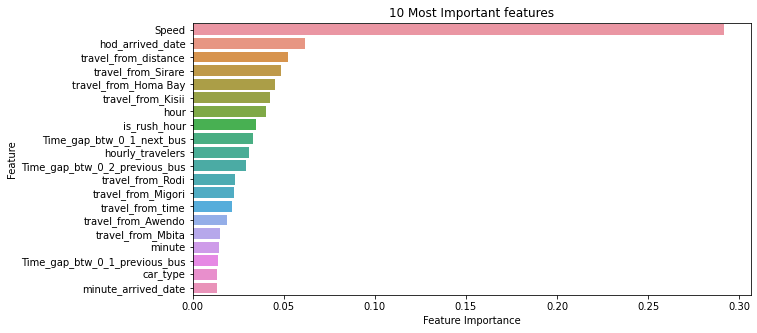

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y = important_features['Feature'], x = important_features['Feature Importance'] )
plt.title('10 Most Important features')
plt.show()

### **Evaluating the model**

In [ ]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, test_preds)))
print('R2 Score: ',r2)
print('Adjusted R2 Score: ',adj_r2)


Mean Squared Error (MSE):  11.849300888127685
Mean Absolute Error (MAE):  2.2667203277465098
Root Mean Squared Error (MSE):  3.442281349356511
R2 Score:  0.8421125457491907
Adjusted R2 Score:  0.838668297862708
